In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import torch

from tqdm.notebook import tqdm #progress bar tracker for loops

plt.style.use('ggplot')

sia = SentimentIntensityAnalyzer()


OSError: [WinError 126] The specified module could not be found. Error loading "c:\Users\AdvayAdmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [51]:
# Download NLTK data for stopwords and WordNet lemmatizer

#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')


In [52]:
#file path student

student_file_path_fall_21 = 'C:/AdvayRepos/personal_projects/SEC/data/StudentData/Fall_2021_Student_Feedback_Responses.xlsx'
student_file_path_fall_22 = 'C:/AdvayRepos/personal_projects/SEC/data/StudentData/Fall_2022_Student_Feedback_Responses.xlsx'
student_file_path_fall_23 = 'C:/AdvayRepos/personal_projects/SEC/data/StudentData/Fall_2023_Student_Feedback_In_Person_Career_Fair_Responses.xlsx'
student_file_path_spring_23 = 'C:/AdvayRepos/personal_projects/SEC/data/StudentData/Spring_2023_Student_Feedback_Responses.xlsx'

#file path recruiter

recruiter_file_path_fall_21 = 'C:/AdvayRepos/personal_projects/SEC/data/RecruiterData/Fall_2021_Recruiter_Feedback_Responses.xlsx'
recruiter_file_path_fall_22 = 'C:/AdvayRepos/personal_projects/SEC/data/RecruiterData/Fall_2022_Recruiter_Feedback_Responses.xlsx'
recruiter_file_path_spring_22 = 'C:/AdvayRepos/personal_projects/SEC/data/RecruiterData/Spring_2022_Recruiter_Feedback_Responses.xlsx'
recruiter_file_path_fall_23 = 'C:/AdvayRepos/personal_projects/SEC/data/RecruiterData/Fall_2023_Recruiter_Survey_Responses.xlsx'
recruiter_file_path_spring_23 = 'C:/AdvayRepos/personal_projects/SEC/data/RecruiterData/Spring_2023_Recruiter_Feedback_Responses.xlsx'

#student data

student_fall_21 = pd.read_excel(student_file_path_fall_21)
student_fall_22 = pd.read_excel(student_file_path_fall_22)
student_fall_23 = pd.read_excel(student_file_path_fall_23)
student_spring_23 = pd.read_excel(student_file_path_spring_23)

#recruiter data

recruiter_fall_21 = pd.read_excel(recruiter_file_path_fall_21)
recruiter_fall_22 = pd.read_excel(recruiter_file_path_fall_22)
recruiter_spring_22 = pd.read_excel(recruiter_file_path_spring_22)
recruiter_fall_23 = pd.read_excel(recruiter_file_path_fall_23)
recruiter_spring_23 = pd.read_excel(recruiter_file_path_spring_23)



In [53]:
student_spring_23.head()

,id,major,attend_in_person_fair,prepare_options,nr_companies_consider_working,top_companies_enjoyed,overall_rating,nr_recruiters_spoke_to,nr_hours,feedback_in_person,...,attend_welcome_social,rate_welcome_social,feedback_welcome_social,rate_ability_to_communicate_info,where_found_info,use_any_website_resources,feedback_communication,rate_whether_info_sent_timely,add_info,add_comm
0,1,Other,Yes,"Updated and printed your resume, Looked at the...",6,"FBI, SICK",4,4,1-3 Hours,I did not like having to go outside to get to ...,...,No,NaN,NaN,3,"College of Engineering Weekly Emails, Major/De...",Company Search/Information,More emails farther out from the week that cla...,2,NaN,NaN
1,2,Civil and Environmental Engineering,Yes,"Updated and printed your resume, Looked at the...",1,Quiddity and TxDOT,4,2,1-3 Hours,Better Info on the two different entrances,...,No,NaN,NaN,3,SEC Career Fair Website (https://careerfair.se...,Company Search/Information,NaN,4,NaN,NaN
2,3,Electrical and Computer Engineering,Yes,"Updated and printed your resume, Looked at the...",5,Hydroquip\nCharter,5,13,1-3 Hours,I liked the bag drop off and pick up,...,No,NaN,NaN,5,"College of Engineering Weekly Emails, Major/De...","Company Search/Information, Student Checklist",NaN,5,NaN,NaN
3,4,Multidisciplinary Engineering,Yes,Updated and printed your resume,2,Beckhoff,2,10,1-3 Hours,It’s annoying when companies say they are hiri...,...,No,NaN,NaN,1,Friends/Classmates,NaN,NaN,2,Please instruct companies to know what majors ...,NaN
4,5,Other,Yes,"Updated and printed your resume, Looked at the...",10,Sparx,3,4,1-3 Hours,did not like having to exit to get to \nthe ot...,...,No,NaN,NaN,3,SEC Career Fair Website (https://careerfair.se...,"Company Search/Information, Symplicity tutoria...",NaN,3,NaN,NaN


In [54]:
student_spring_23.shape

(53, 24)

<Axes: title={'center': 'Count of Rating'}, xlabel='rating', ylabel='count'>

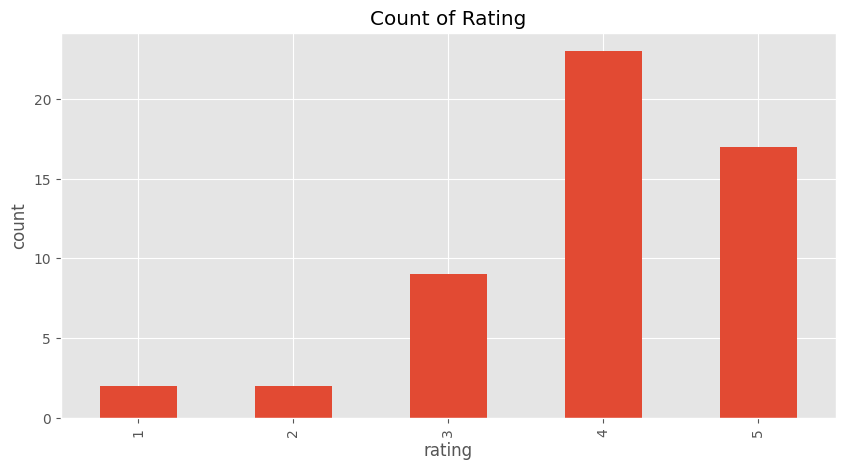

In [55]:
student_spring_23['overall_rating'].value_counts().sort_index().plot(kind = 'bar', title = 'Count of Rating', xlabel = 'rating', ylabel = 'count', figsize = (10,5))

In [56]:
student_spring_23.fillna('No Feedback', inplace = True)
student_spring_23.isnull().sum()

C:\Users\AdvayAdmin\AppData\Local\Temp\ipykernel_32964\4228391218.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Feedback' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  student_spring_23.fillna('No Feedback', inplace = True)


id                                  0
major                               0
attend_in_person_fair               0
prepare_options                     0
nr_companies_consider_working       0
top_companies_enjoyed               0
overall_rating                      0
nr_recruiters_spoke_to              0
nr_hours                            0
feedback_in_person                  0
attend_virtual_fair                 0
attend_company_showcase             0
rate_company_showcase               0
feedback_company_showcase           0
attend_welcome_social               0
rate_welcome_social                 0
feedback_welcome_social             0
rate_ability_to_communicate_info    0
where_found_info                    0
use_any_website_resources           0
feedback_communication              0
rate_whether_info_sent_timely       0
add_info                            0
add_comm                            0
dtype: int64

In [57]:
student_spring_23.head()

,id,major,attend_in_person_fair,prepare_options,nr_companies_consider_working,top_companies_enjoyed,overall_rating,nr_recruiters_spoke_to,nr_hours,feedback_in_person,...,attend_welcome_social,rate_welcome_social,feedback_welcome_social,rate_ability_to_communicate_info,where_found_info,use_any_website_resources,feedback_communication,rate_whether_info_sent_timely,add_info,add_comm
0,1,Other,Yes,"Updated and printed your resume, Looked at the...",6,"FBI, SICK",4,4,1-3 Hours,I did not like having to go outside to get to ...,...,No,No Feedback,No Feedback,3,"College of Engineering Weekly Emails, Major/De...",Company Search/Information,More emails farther out from the week that cla...,2,No Feedback,No Feedback
1,2,Civil and Environmental Engineering,Yes,"Updated and printed your resume, Looked at the...",1,Quiddity and TxDOT,4,2,1-3 Hours,Better Info on the two different entrances,...,No,No Feedback,No Feedback,3,SEC Career Fair Website (https://careerfair.se...,Company Search/Information,No Feedback,4,No Feedback,No Feedback
2,3,Electrical and Computer Engineering,Yes,"Updated and printed your resume, Looked at the...",5,Hydroquip\nCharter,5,13,1-3 Hours,I liked the bag drop off and pick up,...,No,No Feedback,No Feedback,5,"College of Engineering Weekly Emails, Major/De...","Company Search/Information, Student Checklist",No Feedback,5,No Feedback,No Feedback
3,4,Multidisciplinary Engineering,Yes,Updated and printed your resume,2,Beckhoff,2,10,1-3 Hours,It’s annoying when companies say they are hiri...,...,No,No Feedback,No Feedback,1,Friends/Classmates,No Feedback,No Feedback,2,Please instruct companies to know what majors ...,No Feedback
4,5,Other,Yes,"Updated and printed your resume, Looked at the...",10,Sparx,3,4,1-3 Hours,did not like having to exit to get to \nthe ot...,...,No,No Feedback,No Feedback,3,SEC Career Fair Website (https://careerfair.se...,"Company Search/Information, Symplicity tutoria...",No Feedback,3,No Feedback,No Feedback


In [58]:
#example of nltk's ability
example = student_spring_23['feedback_in_person'][26]

In [59]:
tokens = nltk.word_tokenize(example)
tokens

['I',
 'liked',
 'it',
 'better',
 'to',
 'have',
 'all',
 'career',
 'fair',
 'areas',
 'inside',
 'where',
 'we',
 'did',
 "n't",
 'have',
 'to',
 'go',
 'outside',
 'to',
 'find',
 'the',
 'club',
 'zone',
 '.']

In [60]:
#tells us parts of speech (pos) like NN is singular noun and NNS is plural noun
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('liked', 'VBD'),
 ('it', 'PRP'),
 ('better', 'JJR'),
 ('to', 'TO'),
 ('have', 'VB'),
 ('all', 'DT'),
 ('career', 'NN'),
 ('fair', 'JJ'),
 ('areas', 'NNS')]

In [61]:
#nltk can chunk bits of text together
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  liked/VBD
  it/PRP
  better/JJR
  to/TO
  have/VB
  all/DT
  career/NN
  fair/JJ
  areas/NNS
  inside/IN
  where/WRB
  we/PRP
  did/VBD
  n't/RB
  have/VB
  to/TO
  go/VB
  outside/JJ
  to/TO
  find/VB
  the/DT
  club/NN
  zone/NN
  ./.)


In [62]:

sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [63]:

sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [64]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.7906}

In [65]:
#entire dataset
columns_of_interest = ['feedback_in_person', 'feedback_company_showcase', 
                       'feedback_welcome_social', 'feedback_communication']
res = {}
# Iterate over the DataFrame with a progress bar
for i, row in tqdm(student_spring_23.iterrows(), total=len(student_spring_23)):
    myid = row['id']
    res[myid] = {}
    for col in columns_of_interest:
        text = row[col]
        if pd.notna(text):  # Check if the text is not NaN
            text = str(text)  # Ensure text is a string
            sentiment_scores = sia.polarity_scores(text)
            res[myid][f"{col}_neg"] = sentiment_scores['neg']
            res[myid][f"{col}_neu"] = sentiment_scores['neu']
            res[myid][f"{col}_pos"] = sentiment_scores['pos']
            res[myid][f"{col}_compound"] = sentiment_scores['compound']
        else:
            res[myid][f"{col}_neg"] = 0
            res[myid][f"{col}_neu"] = 0
            res[myid][f"{col}_pos"] = 0
            res[myid][f"{col}_compound"] = 0

# Convert results dictionary to DataFrame
results_df = pd.DataFrame.from_dict(res, orient='index')

# Reset index to make 'id' a column again
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'id'}, inplace=True)

# Display the DataFrame to check its structure
print("First few rows of the results DataFrame:")
results_df.head()


  0%|          | 0/53 [00:00<?, ?it/s]

First few rows of the results DataFrame:


,id,feedback_in_person_neg,feedback_in_person_neu,feedback_in_person_pos,feedback_in_person_compound,feedback_company_showcase_neg,feedback_company_showcase_neu,feedback_company_showcase_pos,feedback_company_showcase_compound,feedback_welcome_social_neg,feedback_welcome_social_neu,feedback_welcome_social_pos,feedback_welcome_social_compound,feedback_communication_neg,feedback_communication_neu,feedback_communication_pos,feedback_communication_compound
0,1,0.140,0.860,0.000,-0.2755,0.688,0.312,0.0,-0.296,0.688,0.312,0.0,-0.296,0.000,1.000,0.0,0.000
1,2,0.000,0.674,0.326,0.4404,0.688,0.312,0.0,-0.296,0.688,0.312,0.0,-0.296,0.688,0.312,0.0,-0.296
2,3,0.193,0.550,0.257,0.1779,0.688,0.312,0.0,-0.296,0.688,0.312,0.0,-0.296,0.688,0.312,0.0,-0.296
3,4,0.110,0.890,0.000,-0.2144,0.688,0.312,0.0,-0.296,0.688,0.312,0.0,-0.296,0.688,0.312,0.0,-0.296
4,5,0.161,0.839,0.000,-0.2755,0.688,0.312,0.0,-0.296,0.688,0.312,0.0,-0.296,0.688,0.312,0.0,-0.296


In [66]:
results_df = results_df.merge(student_spring_23, how = 'left')

In [67]:
results_df.head()

,id,feedback_in_person_neg,feedback_in_person_neu,feedback_in_person_pos,feedback_in_person_compound,feedback_company_showcase_neg,feedback_company_showcase_neu,feedback_company_showcase_pos,feedback_company_showcase_compound,feedback_welcome_social_neg,...,attend_welcome_social,rate_welcome_social,feedback_welcome_social,rate_ability_to_communicate_info,where_found_info,use_any_website_resources,feedback_communication,rate_whether_info_sent_timely,add_info,add_comm
0,1,0.140,0.860,0.000,-0.2755,0.688,0.312,0.0,-0.296,0.688,...,No,No Feedback,No Feedback,3,"College of Engineering Weekly Emails, Major/De...",Company Search/Information,More emails farther out from the week that cla...,2,No Feedback,No Feedback
1,2,0.000,0.674,0.326,0.4404,0.688,0.312,0.0,-0.296,0.688,...,No,No Feedback,No Feedback,3,SEC Career Fair Website (https://careerfair.se...,Company Search/Information,No Feedback,4,No Feedback,No Feedback
2,3,0.193,0.550,0.257,0.1779,0.688,0.312,0.0,-0.296,0.688,...,No,No Feedback,No Feedback,5,"College of Engineering Weekly Emails, Major/De...","Company Search/Information, Student Checklist",No Feedback,5,No Feedback,No Feedback
3,4,0.110,0.890,0.000,-0.2144,0.688,0.312,0.0,-0.296,0.688,...,No,No Feedback,No Feedback,1,Friends/Classmates,No Feedback,No Feedback,2,Please instruct companies to know what majors ...,No Feedback
4,5,0.161,0.839,0.000,-0.2755,0.688,0.312,0.0,-0.296,0.688,...,No,No Feedback,No Feedback,3,SEC Career Fair Website (https://careerfair.se...,"Company Search/Information, Symplicity tutoria...",No Feedback,3,No Feedback,No Feedback


In [68]:
columns_of_interest

['feedback_in_person',
 'feedback_company_showcase',
 'feedback_welcome_social',
 'feedback_communication']

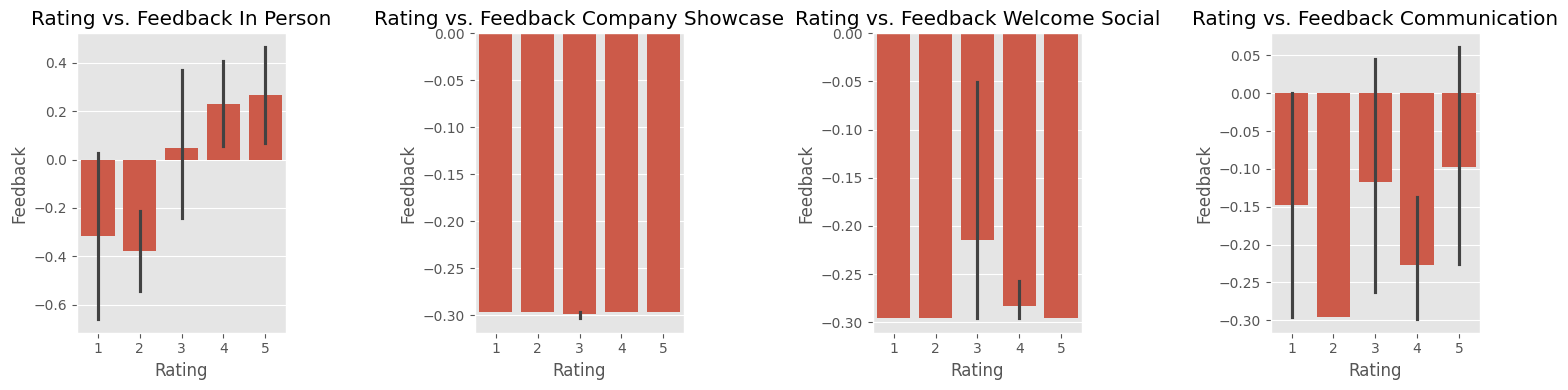

In [74]:

# Set up the figure and axes
fig, axs = plt.subplots(1, len(columns_of_interest), figsize=(15, 4))

# Create subplots for each column in columns_of_interest
for i, col in enumerate(columns_of_interest):
    sns.barplot(data=results_df, x='overall_rating', y=f'{col}_compound', ax=axs[i])
    axs[i].set_title(f'Rating vs. {col.replace("_", " ").title()}')
    axs[i].set_xlabel('Rating')
    axs[i].set_ylabel('Feedback')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.subplots_adjust(wspace=0.9)
plt.show()


In [ ]:
#KAGGLE TRANSPORT

In [ ]:
#entire dataset
columns_of_interest = ['feedback_in_person', 'feedback_company_showcase', 
                       'feedback_welcome_social', 'feedback_communication']
res = {}
# Iterate over the DataFrame with a progress bar
for i, row in tqdm(student_spring_23.iterrows(), total=len(student_spring_23)):
    myid = row['id']
    res[myid] = {}
    for col in columns_of_interest:
        text = row[col]
        if pd.notna(text):  # Check if the text is not NaN
            text = str(text)  # Ensure text is a string
            sentiment_scores = sia.polarity_scores(text)
            res[myid][f"{col}_neg"] = sentiment_scores['neg']
            res[myid][f"{col}_neu"] = sentiment_scores['neu']
            res[myid][f"{col}_pos"] = sentiment_scores['pos']
            res[myid][f"{col}_compound"] = sentiment_scores['compound']
        else:
            res[myid][f"{col}_neg"] = 0
            res[myid][f"{col}_neu"] = 0
            res[myid][f"{col}_pos"] = 0
            res[myid][f"{col}_compound"] = 0

# Convert results dictionary to DataFrame
results_df = pd.DataFrame.from_dict(res, orient='index')

# Reset index to make 'id' a column again
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'id'}, inplace=True)

# Display the DataFrame to check its structure
print("First few rows of the results DataFrame:")
results_df.head()


In [ ]:
results_df = results_df.merge(student_spring_23, how = 'left')

In [ ]:

# Set up the figure and axes
fig, axs = plt.subplots(1, len(columns_of_interest), figsize=(15, 4))

# Create subplots for each column in columns_of_interest
for i, col in enumerate(columns_of_interest):
    sns.barplot(data=results_df, x='overall_rating', y=f'{col}_compound', ax=axs[i])
    axs[i].set_title(f'Rating vs. {col.replace("_", " ").title()}')
    axs[i].set_xlabel('Rating')
    axs[i].set_ylabel('Feedback')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.subplots_adjust(wspace=0.9)
plt.show()


In [ ]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'robert_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]

}
print(scores_dict)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        
        'roberta_neg' : scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2],
    }
    return scores_dict

In [ ]:
res = {}
# Iterate over the DataFrame with a progress bar
for i, row in tqdm(student_spring_23.iterrows(), total=len(student_spring_23)):
    try:
        myid = row['id']
        res[myid] = {}
        for col in columns_of_interest:
            text = row[col]
            if pd.notna(text):  # Check if the text is not NaN
                text = str(text)  # Ensure text is a string
                sentiment_scores = sia.polarity_scores(text)

                # VADER Sentiment Scores
                res[myid][f"vader_{col}_neg"] = sentiment_scores['neg']
                res[myid][f"vader_{col}_neu"] = sentiment_scores['neu']
                res[myid][f"vader_{col}_pos"] = sentiment_scores['pos']
                res[myid][f"vader_{col}_compound"] = sentiment_scores['compound']

                # RoBERTa Sentiment Scores
                roberta_scores = polarity_scores_roberta(text)
                res[myid][f"roberta_{col}_neg"] = roberta_scores['roberta_neg']
                res[myid][f"roberta_{col}_neu"] = roberta_scores['roberta_neu']
                res[myid][f"roberta_{col}_pos"] = roberta_scores['roberta_pos']
            else:
                res[myid][f"vader_{col}_neg"] = 0
                res[myid][f"vader_{col}_neu"] = 0
                res[myid][f"vader_{col}_pos"] = 0
                res[myid][f"vader_{col}_compound"] = 0
                res[myid][f"roberta_{col}_neg"] = 0
                res[myid][f"roberta_{col}_neu"] = 0
                res[myid][f"roberta_{col}_pos"] = 0
    except RuntimeError:
        print(f'Broke for id {myid}')


In [ ]:
# Convert results dictionary to DataFrame
results_df_new = pd.DataFrame.from_dict(res, orient='index')

# Reset index to make 'id' a column again
results_df_new.reset_index(inplace=True)
results_df_new.rename(columns={'index': 'id'}, inplace=True)

results_df_new = results_df_new.merge(student_spring_23, how = 'left')

In [ ]:
# Shorten column names
short_columns = {
    'vader_feedback_in_person_neg': 'vader_fip_neg',
    'vader_feedback_in_person_neu': 'vader_fip_neu',
    'vader_feedback_in_person_pos': 'vader_fip_pos',
    'vader_feedback_in_person_compound': 'vader_fip_cmp',
    'roberta_feedback_in_person_neg': 'roberta_fip_neg',
    'roberta_feedback_in_person_neu': 'roberta_fip_neu',
    'roberta_feedback_in_person_pos': 'roberta_fip_pos',
}

# Rename columns
results_df_new = results_df_new.rename(columns=short_columns)

# Create the pairplot with shorter column names
sns.pairplot(data=results_df_new, 
             vars=list(short_columns.values()), 
             hue='overall_rating', 
             palette='tab10')

plt.show()
plt.tight_layout()


In [ ]:
results_df_new.query('overall_rating == 1').sort_values('roberta_fip_pos', ascending = False)['feedback_in_person'].values[0]

In [ ]:
results_df_new.query('overall_rating == 1').sort_values('vader_fip_pos', ascending = False)['feedback_in_person'].values[0]

In [ ]:
results_df_new.query('overall_rating == 5').sort_values('roberta_fip_neg', ascending = False)['feedback_in_person'].values[0]

In [ ]:
results_df_new.query('overall_rating == 5').sort_values('vader_fip_neg', ascending = False)['feedback_in_person'].values[0]